In [1]:
import pandas as pd
import glob, os
#from dataprep.eda import plot_correlation
#from dataprep.eda import plot
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from scipy import stats
from scipy import interpolate
from sklearn.linear_model import LinearRegression
import pandas as pd
#import datacleaner
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


import random
from matplotlib import pyplot as plt
from matplotlib import colors as mpc
plt.rcParams["font.family"] = "Poppins"
from sklearn.mixture import GaussianMixture

import seaborn as sns; sns.set()
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
#from gmr.utils import check_random_state
#from gmr import MVN, GMM, plot_error_ellipses
#random_state = check_random_state(0)

from IPython.display import clear_output

%load_ext autoreload
%autoreload 
%matplotlib inline


import plotly.express as px

import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
#from bioinfokit.analys import get_data, stat
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [2]:
mit = pd.read_csv('MOD-00397-raw.csv')
mit['localtime'] = pd.to_datetime(mit['timestamp_local'],format="%Y-%m-%dT%H:%M:%SZ")
mit.head()

,timestamp,id,timestamp_local,sn,rh,temp,bin0,bin1,bin2,bin3,...,co2,pm1_model_id,pm25_model_id,pm10_model_id,co_model_id,no_model_id,no2_model_id,o3_model_id,co2_model_id,localtime
0,2024-10-01T23:59:32Z,223454681,2024-10-01T23:59:32Z,MOD-00397,85.8,24.8,7.722,0.240,0.070,0.008,...,266.705,10800.0,10801.0,10802.0,10795.0,10790.0,10785.0,10780.0,10775.0,2024-10-01 23:59:32
1,2024-10-01T23:58:32Z,223452687,2024-10-01T23:58:32Z,MOD-00397,85.8,24.8,6.953,0.220,0.049,0.007,...,266.825,10800.0,10801.0,10802.0,10795.0,10790.0,10785.0,10780.0,10775.0,2024-10-01 23:58:32
2,2024-10-01T23:57:32Z,223452689,2024-10-01T23:57:32Z,MOD-00397,85.7,24.8,6.780,0.221,0.060,0.007,...,269.596,10800.0,10801.0,10802.0,10795.0,10790.0,10785.0,10780.0,10775.0,2024-10-01 23:57:32
3,2024-10-01T23:56:32Z,223452686,2024-10-01T23:56:32Z,MOD-00397,85.7,24.8,9.128,0.298,0.063,0.021,...,266.946,10800.0,10801.0,10802.0,10795.0,10790.0,10785.0,10780.0,10775.0,2024-10-01 23:56:32
4,2024-10-01T23:55:32Z,223452688,2024-10-01T23:55:32Z,MOD-00397,85.7,24.8,7.449,0.192,0.051,0.017,...,267.789,10800.0,10801.0,10802.0,10795.0,10790.0,10785.0,10780.0,10775.0,2024-10-01 23:55:32


In [3]:
ts = pd.read_csv('4_factor_MOD-00397/timeseries.csv')
results = pd.read_csv('4_factor_MOD-00397/results.csv')
results['localtime'] = ts['localtime']

data = pd.concat([ts,results['Factor 1'],results['Factor 2'], results['Factor 3'],results['Factor 4'],mit['ws'],mit['wd']],axis=1)
ts['localtime'] = pd.to_datetime(ts['localtime']) #convert timestamp column to pandas timestamp format
data = data.set_index('localtime',append=False) #setindex as local time

data.head()

,Unnamed: 0,bin0,bin1,bin2,bin3,bin4,bin5,co_diff,no_diff,no2_diff,ox_diff,Factor 1,Factor 2,Factor 3,Factor 4,ws,wd
localtime,,,,,,,,,,,,,,,,,
2024-10-01 23:59:32,0.0,7.722,0.240,0.070,0.008,0.013,0.017,77.2,4.8,1.1,1.0,0.0,42.102276,0.0,7.015013,0.68,3.4
2024-10-01 23:58:32,1.0,6.953,0.220,0.049,0.007,0.024,0.007,77.2,4.7,1.3,1.1,0.0,43.195067,0.0,6.526662,0.56,0.9
2024-10-01 23:57:32,2.0,6.780,0.221,0.060,0.007,0.029,0.021,72.1,4.9,1.3,1.2,0.0,39.809132,0.0,6.335638,0.30,33.9
2024-10-01 23:56:32,3.0,9.128,0.298,0.063,0.021,0.029,0.005,72.7,4.8,1.2,0.9,0.0,36.947716,0.0,7.811896,0.04,44.0
2024-10-01 23:55:32,4.0,7.449,0.192,0.051,0.017,0.015,0.016,70.7,4.7,1.1,0.9,0.0,37.940385,0.0,6.699669,0.04,44.0


In [4]:
wd_rad = np.radians(np.array(data['wd'])) #deg to rad
ws = np.array(data['ws']) #m/s
Factor1 = np.array(data['Factor 1'])
Factor2 = np.array(data['Factor 2'])
Factor3 = np.array(data['Factor 3'])
Factor4 = np.array(data['Factor 4'])

In [5]:
WD, WS = np.meshgrid(np.linspace(0, 2*np.pi, 36), np.linspace(min(ws), max(ws), 16 ))
Z1 = interpolate.griddata((wd_rad, ws), Factor1, (WD, WS), method='linear')
Z2 = interpolate.griddata((wd_rad, ws), Factor2, (WD, WS), method='linear')
Z3 = interpolate.griddata((wd_rad, ws), Factor3, (WD, WS), method='linear')
Z4 = interpolate.griddata((wd_rad, ws), Factor4, (WD, WS), method='linear')

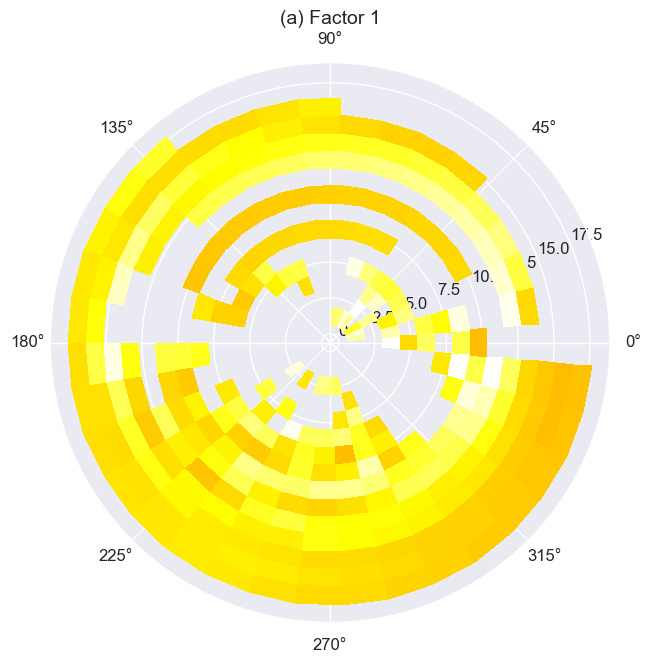

In [6]:
fig = plt.figure(figsize=(16,16))
ax1= fig.add_subplot(221, projection='polar')
ax1.set_title('(a) Factor 1',fontsize=14)
cmap = plt.get_cmap('hot_r')
cmap.set_under('none')
img = ax1.pcolormesh(WD, WS, Z1, cmap=cmap, norm=LogNorm(vmin=.1,vmax=500))
#plt.colorbar(img)
ax1.tick_params(axis='both', which='major', labelsize=12)


In [7]:
ax2= fig.add_subplot(222, projection='polar')
ax2.set_title('(b) Factor 2',fontsize=14)
cmap = plt.get_cmap('hot_r')
cmap.set_under('none')
img = ax2.pcolormesh(WD, WS, Z2, cmap=cmap, norm=LogNorm(vmin=.1,vmax=500))
#plt.colorbar(img)
ax2.tick_params(axis='both', which='major', labelsize=12)

In [8]:
ax3= fig.add_subplot(223, projection='polar')
ax3.set_title('(c) Factor 3',fontsize=14)
cmap = plt.get_cmap('hot_r')
cmap.set_under('none')
img = ax3.pcolormesh(WD, WS, Z3, cmap=cmap, norm=LogNorm(vmin=.1,vmax=500))
#plt.colorbar(img)
ax3.tick_params(axis='both', which='major', labelsize=12)

In [9]:
ax4= fig.add_subplot(224, projection='polar')
ax4.set_title('(c) Factor 4',fontsize=14)
cmap = plt.get_cmap('hot_r')
cmap.set_under('none')
img = ax4.pcolormesh(WD, WS, Z4, cmap=cmap, norm=LogNorm(vmin=.1,vmax=500))
#plt.colorbar(img)
ax4.tick_params(axis='both', which='major', labelsize=12)

In [10]:
#fig.subplots_adjust(top=1)
cbar_ax = fig.add_axes([0.05, 0.05, 0.90, 0.05])
clb=fig.colorbar(img, cax=cbar_ax, orientation='horizontal')#, label='Factor Intensity (a.u.)')
clb.ax.tick_params(labelsize=14) 
clb.ax.set_title('Factor Intensity (a.u.)',fontsize=14)
cbar_ax.tick_params(labelsize=14)

In [11]:
ax1.set_axisbelow(False)
ax1.grid(color='gray', linestyle='dashed',linewidth=2)
ax1.set_rlabel_position(0)


ax2.set_axisbelow(False)
ax2.grid(color='gray', linestyle='dashed',linewidth=2)
ax2.set_rlabel_position(0)


ax3.set_axisbelow(False)
ax3.grid(color='gray', linestyle='dashed',linewidth=2)
ax3.set_rlabel_position(0)

ax4.set_axisbelow(False)
ax4.grid(color='gray', linestyle='dashed',linewidth=2)
ax4.set_rlabel_position(0)
plt.rcParams["font.weight"] = "bold"


In [12]:
plt.tight_layout()
fig.savefig("windrose_4fac_MOD-00397.png", dpi=350)

<Figure size 640x480 with 0 Axes>